Take one strain that has one long chromosome, t.ex. DA63366

Check the repeats coordinates that you got:

1. how many perfect and imperfect matches? -> imperfect have different format
2. how many instances one repeat each record in GRF output corresponds to?
3. what are their locations?
4. between-match distances?


In [2]:
import pandas as pd

def parse_spacer(header, type="perfect"):
    """
    :param header: a char string like '>1:0-190543:951:190482:14m'
    :return: a list of values from parsed header
    """
    first_split = header.split(":")
    record_id = first_split[0][1:]
    repeat_len = int(first_split[-1][:-1])
    range_ = first_split[1].split("-")
    range_start, range_end = int(range_[0]), int(range_[-1])
    repeat_1_start_in_range = int(first_split[2])
    repeat_2_end_in_range = int(first_split[3])

    repeat_1_start_in_chrom = range_start + repeat_1_start_in_range
    repeat_1_end_in_chrom = repeat_1_start_in_chrom + repeat_len

    repeat_2_end_in_chrom = range_start + repeat_2_end_in_range
    repeat_2_start_in_chrom = repeat_2_end_in_chrom - repeat_len

    return [record_id, repeat_1_start_in_chrom, repeat_1_end_in_chrom, repeat_2_start_in_chrom,
            repeat_2_end_in_chrom, repeat_len, type]


in_perf_spacers = "/home/andrei/Data/HeteroR/results/direct_repeats/DA63366/repeats/perfect.spacer.id"
in_imperf_spacers = "/home/andrei/Data/HeteroR/results/direct_repeats/DA63366/repeats/imperfect.id"
with open(in_perf_spacers) as f:
    perf_spacer_ids = [line.rstrip() for line in f.readlines()]
with open(in_imperf_spacers) as f:
    imperf_spacer_ids = [line.rstrip() for line in f.readlines()]

perfect_headers = [parse_spacer(line, type="perfect") for line in perf_spacer_ids]
# imperfect_headers = [parse_spacer(line, type="imperfect") for line in imperf_spacer_ids]
# all_headers = perfect_headers + imperfect_headers
repeats = pd.DataFrame(columns=["record_id", "start_1", "end_1", "start_2", "end_2", "length", "type"], data=perfect_headers)

In [3]:
repeats

,record_id,start_1,end_1,start_2,end_2,length
0,1,156785,156796,355577,355588,11
1,1,155793,155803,354429,354439,10
2,1,156991,157004,355523,355536,13
3,1,155876,155886,354108,354118,10
4,1,157996,158006,355931,355941,10
...,...,...,...,...,...,...
1536315,2,67576,67587,68111,68122,11
1536316,2,57930,57940,58456,58466,10
1536317,2,55882,55892,56401,56411,10
1536318,2,90519,90534,91034,91049,15


In [2]:
len(repeats)

1536320

So, first match (=repeat) 156785-156796 (exclude last character) has 11 matches in the chromosome:

355578-355588 (this one is in the same row as the original match)

452879-452889

753332-753342

1126877-1126887

...
and so on

Can you find these coords in the table?

(you can just grep the original output file)

```
 $ grep "156785" perfect.spacer.id
>1:157454-360569:34544:156785:11m
>1:434016-635175:156785:183822:10m
>1:1054774-1255306:39708:156785:11m
>1:1261074-1464189:89622:156785:11m
>1:1358770-1559935:154610:156785:10m
>1:1359933-1561473:4250:156785:10m
>1:1527329-1728974:27411:156785:10m
>1:1679323-1880692:114499:156785:10m
>1:1736873-1938041:140950:156785:13m
>1:2246869-2447236:51288:156785:10m
>1:2247221-2447552:2073:156785:10m
>1:3032219-3233453:57464:156785:10m
>1:3032219-3233453:144235:156785:12m
>1:3522920-3724079:145392:156785:10m
>1:4242343-4443376:156785:157479:10m
```

which is 15 times

it means that we can find 156785 in columns **start_1** and in **end_2**

But IRL I can't do this - because the coordinates in the table are sums of region coordinates and repeat coordinates

In [9]:
repeats[repeats.end_2 == 156785]


,record_id,start_1,end_1,start_2,end_2,length


In [10]:
repeats[repeats.start_1 == 156785]

,record_id,start_1,end_1,start_2,end_2,length
0,1,156785,156796,355577,355588,11


In [3]:
a = 157454+34544

repeats[repeats.start_1 == a]

,record_id,start_1,end_1,start_2,end_2,length
4259,1,191998,192009,314228,314239,11
30647,1,191998,192009,314228,314239,11
57257,1,191998,192009,314228,314239,11


there are duplicated rows!

A lot of them!

Duplicates come from overlapping regions - I decided to not merge duplicated regions (see note 'On features')

Duplicates is not a problem - I can remove them later using pandas

There are less duplicated rows in the raw output file, because some repeats our found twice in different regions with different relative coordinates

In [4]:
repeats.drop_duplicates(inplace=True)

repeats[repeats.start_1 == a]

,record_id,start_1,end_1,start_2,end_2,length
4259,1,191998,192009,314228,314239,11


In [5]:
len(repeats)

624716

This data frame goes to current GFF file - everything longer than 15 bp

In [7]:
repeats[repeats.length > 15]

,record_id,start_1,end_1,start_2,end_2,length
61,1,163851,163869,355547,355565,18
2315,1,207813,207831,352593,352611,18
2473,1,212688,212705,355527,355544,17
2474,1,212706,212727,355545,355566,21
2475,1,212657,212673,355495,355511,16
...,...,...,...,...,...,...
1519338,2,38948,39768,43390,44210,820
1519454,2,39971,40791,43390,44210,820
1519495,2,28597,28613,31651,31667,16
1519582,2,55328,55344,57697,57713,16


We have just 24 repeats longer than 99 bp (on two contigs)

In [9]:
repeats[repeats.length > 99]

,record_id,start_1,end_1,start_2,end_2,length
25661,1,218570,218712,220018,220160,142
813033,1,2322676,2323162,2409504,2409990,486
912147,1,2747598,2747737,2798101,2798240,139
923022,1,2733788,2733952,2734322,2734486,164
1050257,1,3308401,3308815,3310271,3310685,414
1192413,1,3840375,3841146,3841209,3841980,771
1450538,1,4442299,4442413,4483512,4483626,114
1450540,1,4442493,4447465,4483706,4488678,4972
1462915,1,4486977,4488764,4626563,4628350,1787
1462916,1,4488770,4488883,4628356,4628469,113


## Everything looks normal now

test imperfect repeats as was planned and proceed to evaluation of discovered repeats

# GRF intersperse
Using intersperse mode I get the following results:

command:

```
cd /home/andrei/Data/HeteroR/test_dir/GRF/DA63366
grf-intersperse -i regions.fasta -o out_interspersed -t 12 -f 0 -c 2 -s 10 -p 90
```
fasta output looks OK sizewise

In [2]:
from Bio import SeqIO
import pandas as pd

in_interspersed_repeats = "/home/andrei/Data/HeteroR/test_dir/GRF/DA63366/out_interspersed/interspersed_repeat.out"

repeats = [rec for rec in SeqIO.parse(in_interspersed_repeats, "fasta")]
lengths = pd.Series([len(rec) for rec in repeats])

lengths.describe()

count    1.004369e+07
mean     1.312339e+01
std      3.246630e+02
min      1.000000e+01
25%      1.000000e+01
50%      1.000000e+01
75%      1.000000e+01
max      1.923910e+05
dtype: float64

/home/andrei/miniconda3/envs/snakemake/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/andrei/miniconda3/envs/snakemake/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

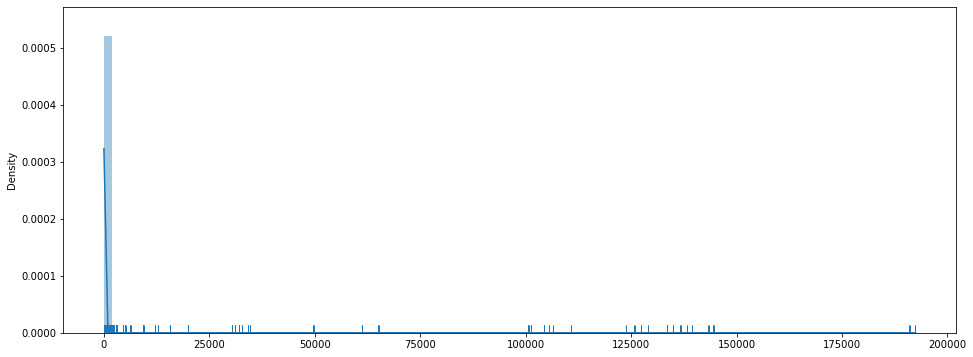

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(16,6))

sns.distplot(lengths, bins=100, rug=True, hist=True, norm_hist=False)

In [6]:
len(lengths[lengths > 10000])

112